# Explore here

It's recommended to use this notebook for exploration purposes.

In [2]:
!pip install pandas requests beautifulsoup4

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
import requests
from bs4 import BeautifulSoup

# Realizar la solicitud HTTP
url = 'https://stockanalysis.com/stocks/tsla/revenue/'
response = requests.get(url)

# Verificar si la solicitud fue exitosa
print(f"Estado de la respuesta: {response.status_code}")

if response.status_code == 200:
    html_content = response.text

    # Parsear el contenido HTML
    soup = BeautifulSoup(html_content, 'html.parser')

    # Intentar encontrar la tabla con la clase específica
    table = soup.find('table', {'class': 'svelte-1jtwn20'})

    # Verificar si se encontró la tabla
    if table:
        print("Tabla encontrada. Extrayendo datos...")
        
        # Inicializar una lista para almacenar todos los datos de la tabla
        data = []
        
        # Extraer las filas de la tabla
        rows = table.find_all('tr')
        
        # Extraer las cabeceras de la tabla
        headers = [header.get_text() for header in rows[0].find_all('th')]
        data.append(headers)
        
        # Extraer el contenido de cada fila
        for row in rows[1:]:  # Saltar la cabecera
            values = [value.get_text() for value in row.find_all('td')]
            data.append(values)
        
        # Imprimir los datos extraídos
        for row in data:
            print(row)
    else:
        print("No se encontró una tabla con la clase especificada.")
else:
    print(f"Error al realizar la solicitud HTTP: {response.status_code}")


Estado de la respuesta: 200
Tabla encontrada. Extrayendo datos...
['Fiscal Year End ', 'Revenue ', 'Change ', 'Growth ']
['Dec 31, 2023', '96.77B', '15.31B', '18.80%']
['Dec 31, 2022', '81.46B', '27.64B', '51.35%']
['Dec 31, 2021', '53.82B', '22.29B', '70.67%']
['Dec 31, 2020', '31.54B', '6.96B', '28.31%']
['Dec 31, 2019', '24.58B', '3.12B', '14.52%']
['Dec 31, 2018', '21.46B', '9.70B', '82.51%']
['Dec 31, 2017', '11.76B', '4.76B', '67.98%']
['Dec 31, 2016', '7.00B', '2.95B', '73.01%']
['Dec 31, 2015', '4.05B', '847.67M', '26.50%']
['Dec 31, 2014', '3.20B', '1.18B', '58.85%']
['Dec 31, 2013', '2.01B', '1.60B', '387.23%']
['Dec 31, 2012', '413.26M', '209.01M', '102.34%']
['Dec 31, 2011', '204.24M', '87.50M', '74.95%']
['Dec 31, 2010', '116.74M', '4.80M', '4.29%']
['Dec 31, 2009', '111.94M', '97.20M', '659.35%']
['Dec 31, 2008', '14.74M', '14.67M', '20,094.52%']
['Dec 31, 2007', '73.00K', '-', '-']


In [5]:
import pandas as pd

# Ahora convertimos la lista de datos en un DataFrame de Pandas
df = pd.DataFrame(data[1:], columns=[col.strip() for col in data[0]])

# Imprimimos los nombres de las columnas para verificar
print(df.columns)

def convert_to_number(x):
    if x == '-':  # Verifica si el valor es un guión y lo reemplaza por 0
        return 0.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1e9
    elif 'M' in x:
        return float(x.replace('M', '')) * 1e6
    elif 'K' in x:
        return float(x.replace('K', '')) * 1e3
    else:
        return float(x)

df['Revenue'] = df['Revenue'].str.replace(',', '').apply(convert_to_number)
df['Change'] = df['Change'].str.replace(',', '').apply(convert_to_number)


# Para 'Growth', eliminamos tanto las comas como el símbolo de porcentaje antes de la conversión
df['Growth'] = df['Growth'].str.replace(',', '').str.rstrip('%').replace('-', '0').astype(float) / 100

# Imprimimos el DataFrame resultante para verificar
print(df)




Index(['Fiscal Year End', 'Revenue', 'Change', 'Growth'], dtype='object')
   Fiscal Year End       Revenue        Change    Growth
0     Dec 31, 2023  9.677000e+10  1.531000e+10    0.1880
1     Dec 31, 2022  8.146000e+10  2.764000e+10    0.5135
2     Dec 31, 2021  5.382000e+10  2.229000e+10    0.7067
3     Dec 31, 2020  3.154000e+10  6.960000e+09    0.2831
4     Dec 31, 2019  2.458000e+10  3.120000e+09    0.1452
5     Dec 31, 2018  2.146000e+10  9.700000e+09    0.8251
6     Dec 31, 2017  1.176000e+10  4.760000e+09    0.6798
7     Dec 31, 2016  7.000000e+09  2.950000e+09    0.7301
8     Dec 31, 2015  4.050000e+09  8.476700e+08    0.2650
9     Dec 31, 2014  3.200000e+09  1.180000e+09    0.5885
10    Dec 31, 2013  2.010000e+09  1.600000e+09    3.8723
11    Dec 31, 2012  4.132600e+08  2.090100e+08    1.0234
12    Dec 31, 2011  2.042400e+08  8.750000e+07    0.7495
13    Dec 31, 2010  1.167400e+08  4.800000e+06    0.0429
14    Dec 31, 2009  1.119400e+08  9.720000e+07    6.5935
15    Dec 31, 

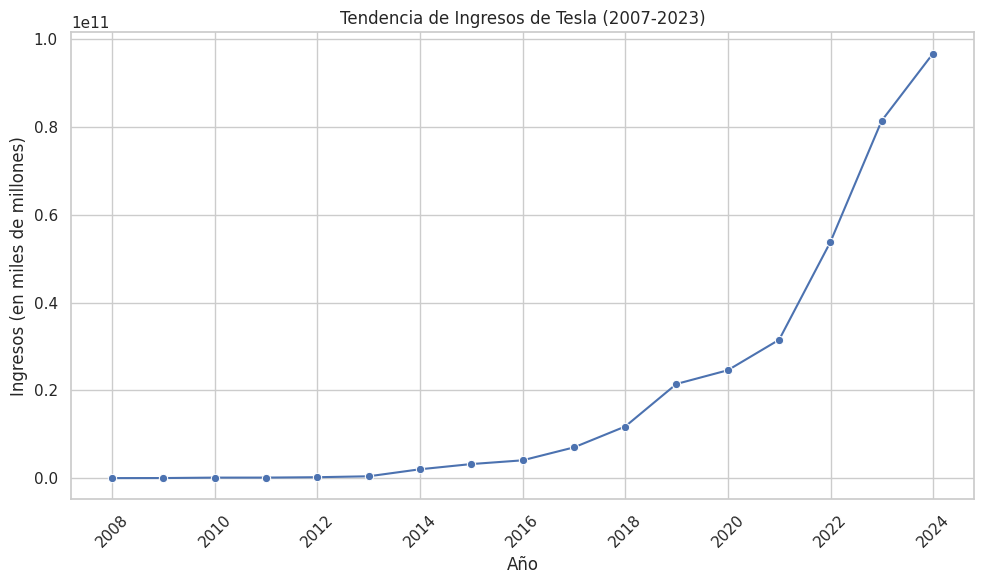

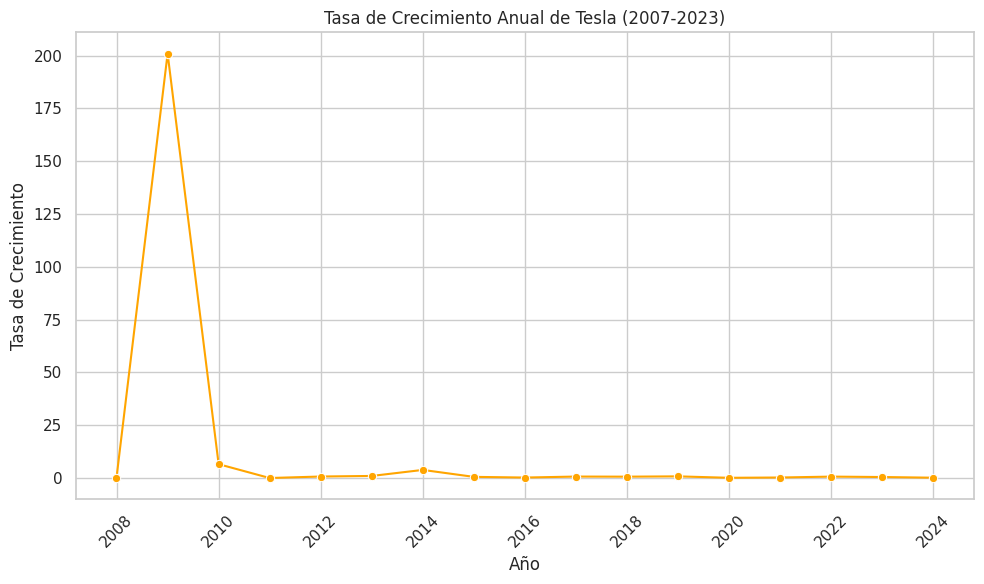

/tmp/ipykernel_648/2307499161.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fiscal Year End', y='Change', data=df, palette='viridis')


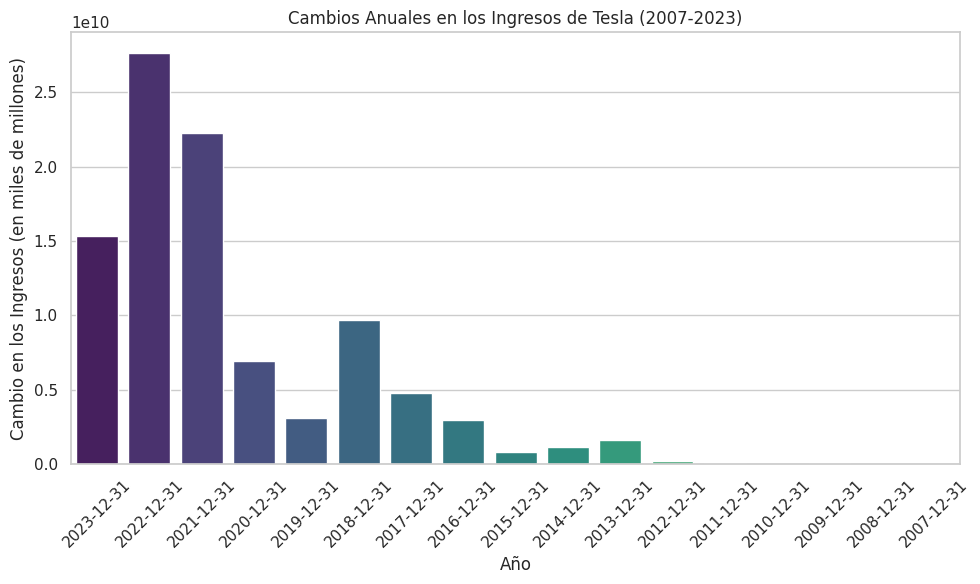

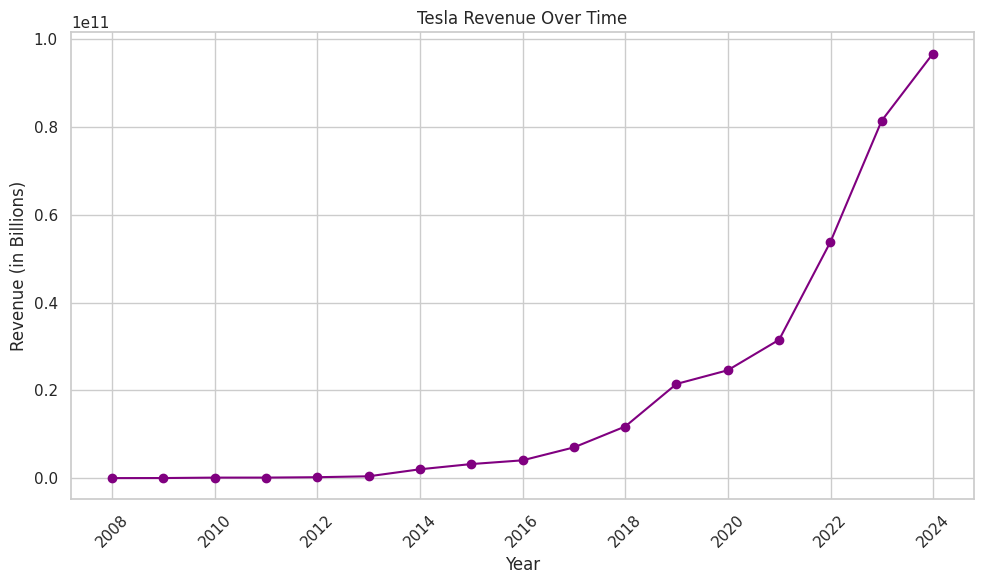

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de Seaborn
sns.set(style="whitegrid")

# Convertir 'Fiscal Year End' a datetime para facilitar la visualización
df['Fiscal Year End'] = pd.to_datetime(df['Fiscal Year End'])

# 1. Tendencia de ingresos a lo largo de los años
plt.figure(figsize=(10, 6))
sns.lineplot(x='Fiscal Year End', y='Revenue', data=df, marker='o')
plt.title('Tendencia de Ingresos de Tesla (2007-2023)')
plt.xlabel('Año')
plt.ylabel('Ingresos (en miles de millones)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Tasa de crecimiento año tras año
plt.figure(figsize=(10, 6))
sns.lineplot(x='Fiscal Year End', y='Growth', data=df, marker='o', color='orange')
plt.title('Tasa de Crecimiento Anual de Tesla (2007-2023)')
plt.xlabel('Año')
plt.ylabel('Tasa de Crecimiento')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Cambios anuales en los ingresos
plt.figure(figsize=(10, 6))
sns.barplot(x='Fiscal Year End', y='Change', data=df, palette='viridis')
plt.title('Cambios Anuales en los Ingresos de Tesla (2007-2023)')
plt.xlabel('Año')
plt.ylabel('Cambio en los Ingresos (en miles de millones)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


